In [1]:
# Import library

import os
import pandas as pd # Data manipulation
import numpy as np # scientific computuation

import missingno as msno # Missing data visualization module

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

In [2]:
#project root
PROJ_ROOT = os.path.join(os.pardir)

#reports dir
output_dir = "../reports/figures/"

In [3]:
#data path
insurance_data_path = os.path.join(PROJ_ROOT,
                                  "data",
                                  "raw",
                                  "insurance.csv")

In [4]:
#data-frame

df = pd.read_csv(insurance_data_path)

data dictonary:

+ age: age of primary beneficiary

+ sex: insurance contractor gender, female, male

+ bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

+ children: Number of children covered by health insurance / Number of dependents

+ smoker: Smoking

+ region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

+ charges: Individual medical costs billed by health insurance

In [5]:
#view top 5 observations
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#descriptive statistics 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


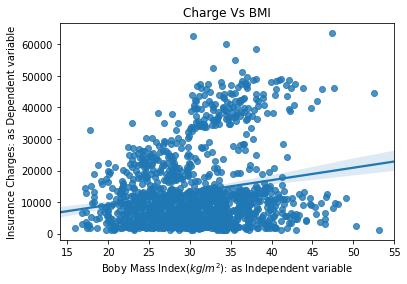

In [7]:
sns.regplot(x='bmi',y='charges',data=df)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI')

plt.savefig('{}/regression-plot-of-charges-vs-bmi.png'.format(output_dir))

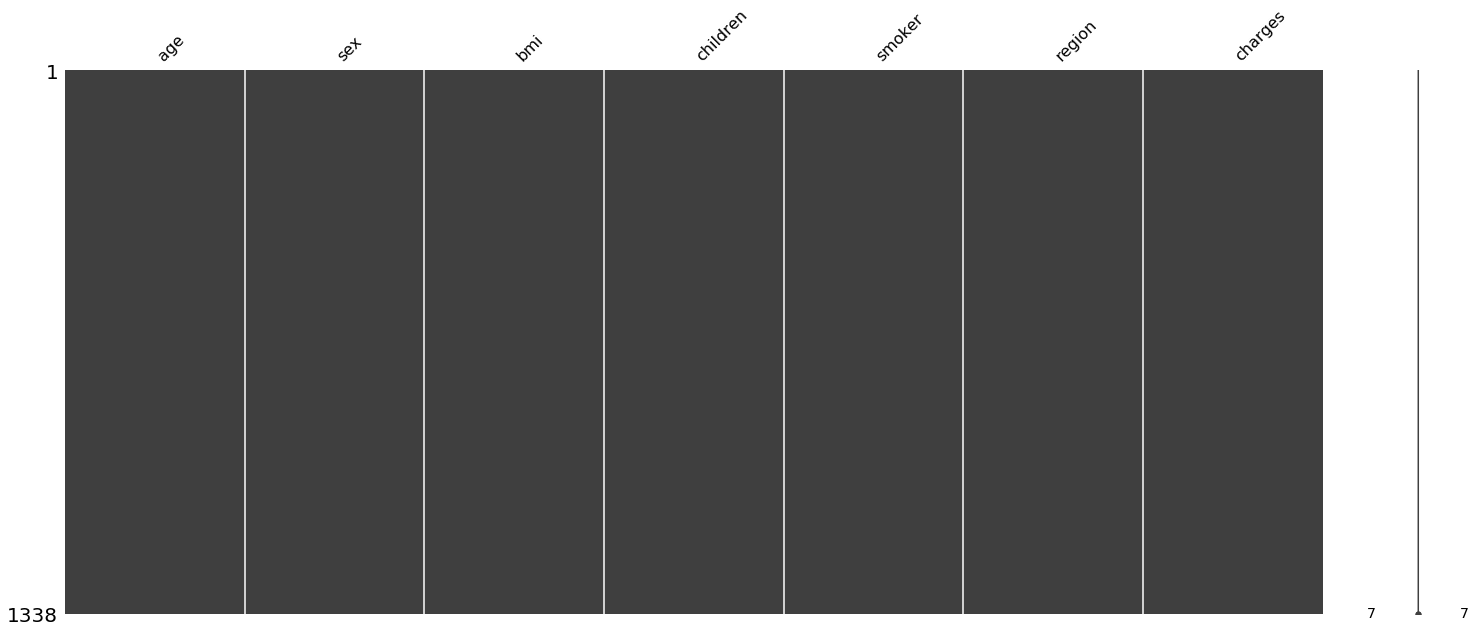

In [8]:
msno.matrix(df)

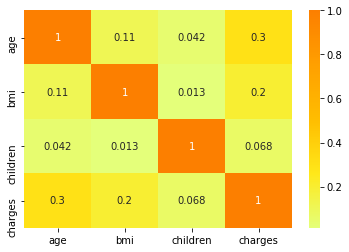

In [9]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

plt.savefig('{}/corelation-plot.png'.format(output_dir))

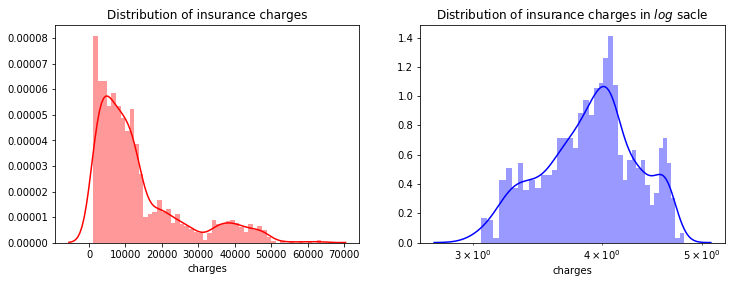

In [10]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

plt.savefig('{}/distribution-plot.png'.format(output_dir))

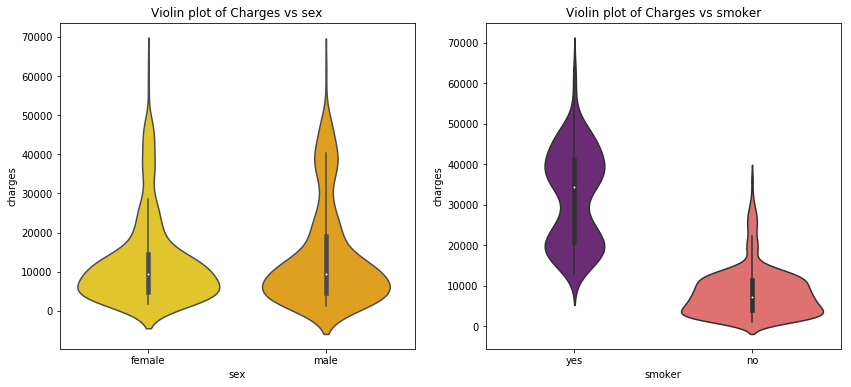

In [11]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

plt.savefig('{}/violin-plot-of-charges-vs-sex-and-smoker.png'.format(output_dir))

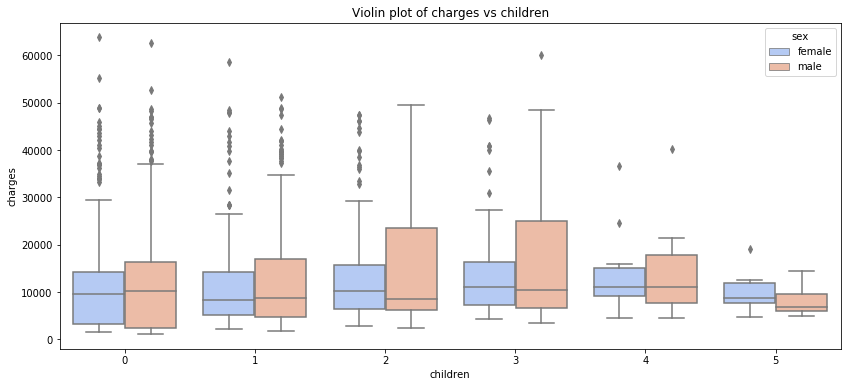

In [12]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='coolwarm')
plt.title('Violin plot of charges vs children')

plt.savefig('{}/violin-plot-of-charges-vs-children.png'.format(output_dir))

In [13]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


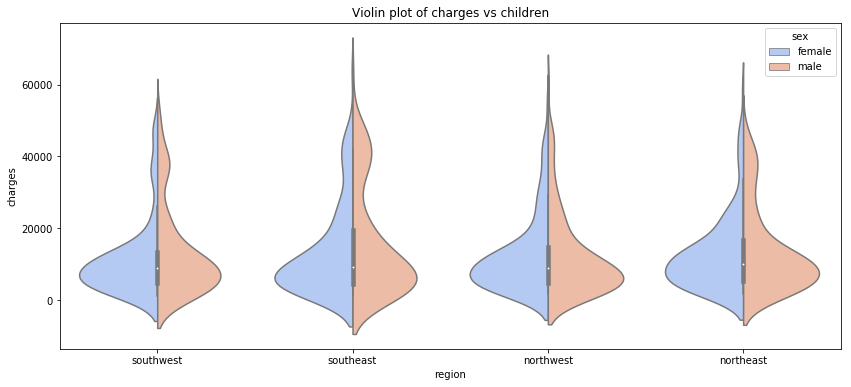

In [14]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='coolwarm',split=True)
plt.title('Violin plot of charges vs children')

plt.savefig('{}/violin-plot-of-charges-plot1.png'.format(output_dir))

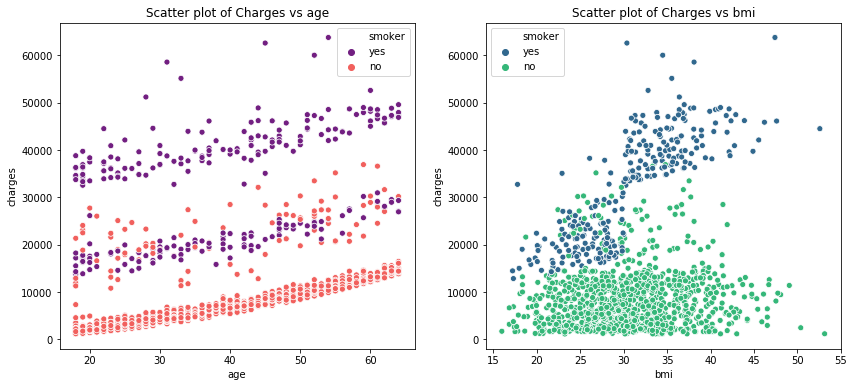

In [15]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')

plt.savefig('{}/scatter-plot.png'.format(output_dir))